In [1]:
cd ../src

/storage2/home2/e1-313-15477/govind/s2slp/src


In [2]:
import data_preparer

In [3]:
# Read and store prepared data for future use; DONE ONLY ONCE
# data_preparer.main()

In [45]:
data_home = '/home2/e1-313-15477/govind/s2slp/data/'
data_name = 'sample_data'
# data_name = 'main_data'
prepared_data_params = {'data_home': data_home,
                        'data_name': data_name}
import pickle
import os
from utils import incidence_to_hyperedges, get_bipartite_nbrs
# def predict_links(prepared_data_params):
i = 0
s2slp_data = pickle.load(open(os.path.join(prepared_data_params['data_home'], prepared_data_params['data_name'],
                                           '{}.{}.s2slp'.format(prepared_data_params['data_name'], i)),
                                           'rb'))

In [46]:
S, S_, B = s2slp_data[:3]
train_pairs = list(zip(*s2slp_data.train_pos)) + list(zip(*s2slp_data.train_neg))
train_labels = [1]*len(s2slp_data.train_pos[0]) + [0]*len(s2slp_data.train_neg[0])
test_pairs = list(zip(*s2slp_data.test_pos)) + list(zip(*s2slp_data.test_neg))
test_labels = [1]*len(s2slp_data.test_pos[0]) + [0]*len(s2slp_data.test_neg[0])
A = S*B*S_.T
nbrs, nbrs_ = get_bipartite_nbrs(A)
def get_lp_scores(v, v_):
    nbrs_v = nbrs.get(v, set()) # Subset of V'
    
    nbrs_nbrs_v = set() # Subset of V
    for nv in nbrs_v: # n_v is an element of V'
        nbrs_nv = nbrs_[nv] # Subset of V
        nbrs_nbrs_v.update(nbrs_nv)
    nbrs_v_ = nbrs_.get(v_, set()) # Subset of V
    
    nbrs_nbrs_v_ = set() # Subset of V'
    for nv_ in nbrs_v_: # n_v_ is an element of V
        nbrs_nv_ = nbrs[nv_] # Subset of V'
        nbrs_nbrs_v_.update(nbrs_nv_)
#     nbrs_nbrs_v.discard(v)
#     nbrs_nbrs_v_.discard(v_)
    cn = nbrs_nbrs_v.intersection(nbrs_v_)
#     print(v, v_, nbrs_nbrs_v, nbrs_v_)
    cn_ = nbrs_nbrs_v_.intersection(nbrs_v)
#     print(v, v_, nbrs_v, nbrs_nbrs_v_)
    scores = {'cn': len(cn), 'cn_': len(cn_), 'cn_mean': (len(cn)+len(cn_))/2}
    return scores

train_results = {}
for (v, v_), l in zip(train_pairs, train_labels):
    result = {}
    scores = get_lp_scores(v, v_)
    result.update(scores)
    result.update({'label': l})
    train_results.update({(v, v_): result})
# print('')
test_results = {}
for (v, v_), l in zip(test_pairs, test_labels):
    result = {}
    scores = get_lp_scores(v, v_)
    result.update(scores)
    result.update({'label': l})
    test_results.update({(v, v_): result})

In [47]:
import pandas as pd
df = pd.DataFrame(train_results).T

In [48]:
from collections import Counter
C = A
G = nx.bipartite.from_biadjacency_matrix(C)
nx.bipartite.density(G, range(C.shape[0]))
cc = list(nx.connected_components(G))
C.shape, C.nnz, len(cc), sorted(dict(Counter([len(x) for x in cc])).items(), key=lambda x: -x[0])

((5, 6), 24, 1, [(11, 1)])

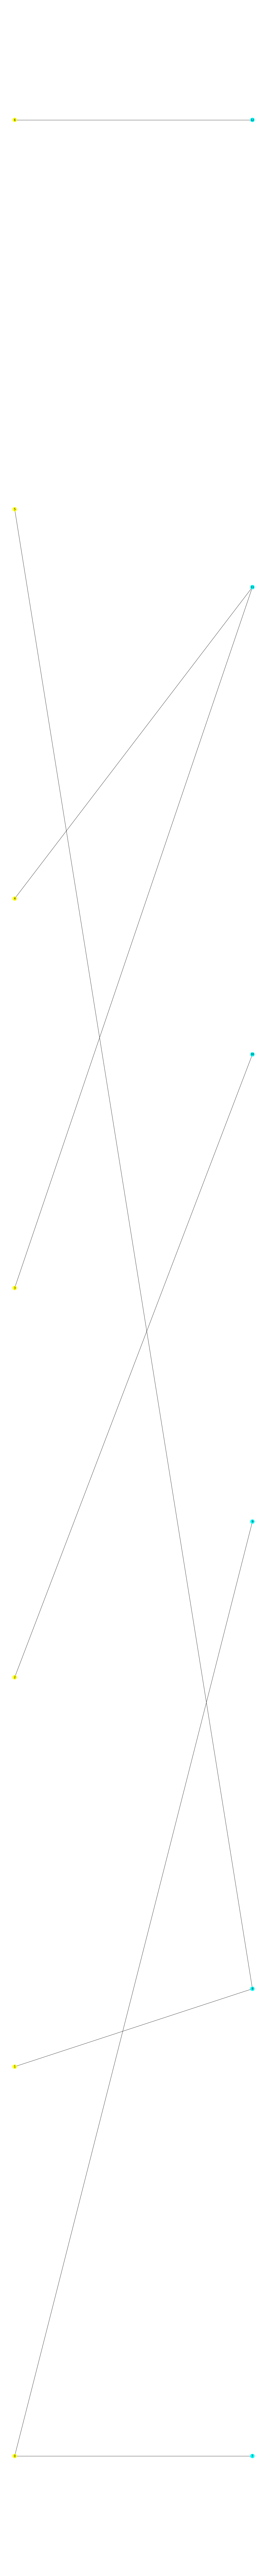

In [49]:
import networkx as nx
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20, 200))
G = nx.bipartite.from_biadjacency_matrix(B)
# top = nx.bipartite.sets(G)[0]
pos = nx.drawing.layout.bipartite_layout(G, range(B.shape[0]))
nx.draw(G, pos, with_labels=True, node_color=['yellow']*B.shape[0] + ['cyan']*B.shape[1], ax=ax)

In [12]:
x = 0
y = 0
for i in s2slp_data.test_pos[1]:
    if i not in nbrs_:
        x+= 1
    else:
        y+= 1

In [13]:
x, y

(247, 510)

In [14]:
x = 0
y = 0
for i in s2slp_data.test_pos[0]:
    if i not in nbrs:
        x+= 1
    else:
        y+= 1

In [15]:
x, y

(127, 630)